<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/MC_acierto_y_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate

In [50]:
def f(x):
    """Función: f(x) = √(arctan(x))"""
    return np.sqrt(np.arctan(x))

def monte_carlo_integral(num_points):
    """
    Aproximación de la integral por método de Monte Carlo de acierto y error
    num_points (int): Número de puntos aleatorios a generar

    """
    # Generar puntos aleatorios en el rectángulo [0,1] x [0, f(1)]
    x = np.random.uniform(0, 1, num_points)
    y = np.random.uniform(0, f(1), num_points)

    # Contar puntos bajo la curva
    puntos_bajo_curva = np.sum(y <= f(x))

    # Calcular la aproximación del área
    area_rectangulo = 1 * f(1)
    area_aproximada = (puntos_bajo_curva / num_points) * area_rectangulo

    return area_aproximada, x, y

In [51]:
def graficar_resultado(x_total, y_total, n):
    """
    Graficar la función, el rectángulo delimitador y los puntos de Monte Carlo

    x_total (array): Coordenadas x de todos los puntos generados
    y_total (array): Coordenadas y de todos los puntos generados
    n (int): Número total de puntos
    """
    # Crear una figura y ejes
    plt.figure(figsize=(10, 6))

    # Generar puntos para graficar la función
    x_func = np.linspace(0, 1, 200)
    y_func = f(x_func)

    # Graficar la función
    plt.plot(x_func, y_func, 'r-', label='f(x) = √(arctan(x))')

    # Graficar el rectángulo delimitador
    plt.plot([0, 1, 1, 0, 0], [0, 0, f(1), f(1), 0], 'darkorchid', label='Rectángulo delimitador')

    # Separar puntos dentro y fuera de la curva
    y_puntos = f(x_total)
    dentro = y_total <= y_puntos
    fuera = ~dentro

    # Graficar puntos
    plt.scatter(x_total[dentro], y_total[dentro], color='hotpink', alpha=0.5, label='Puntos dentro')
    plt.scatter(x_total[fuera], y_total[fuera], color='indianred', alpha=0.5, label='Puntos fuera')

    plt.title(f'Método de Monte Carlo - Aproximación de Integral\n{n} puntos')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [52]:
def calcular_convergencia(max_puntos=10000, num_experimentos=50):
    """
    Calcular la convergencia del método de Monte Carlo

    max_puntos (int): Número máximo de puntos
    num_experimentos (int): Número de experimentos para promediar

    """
    # Calcular el valor real de la integral
    integral_real, _ = integrate.quad(f, 0, 1)

    # Generar arreglo de números de puntos con escala logarítmica
    numeros_puntos = np.unique(np.logspace(1, np.log10(max_puntos), 50).astype(int))

    # Almacenar resultados de cada experimento
    resultados = np.zeros((num_experimentos, len(numeros_puntos)))

    # Realizar experimentos
    for i in range(num_experimentos):
        for j, num_points in enumerate(numeros_puntos):
            integral_aprox, _, _ = monte_carlo_integral(num_points)
            resultados[i, j] = integral_aprox

    # Calcular estadísticas
    valores_promedio = np.mean(resultados, axis=0)
    desviacion_estandar = np.std(resultados, axis=0)

    return numeros_puntos, valores_promedio, desviacion_estandar, integral_real

def graficar_convergencia(numeros_puntos, valores_promedio, desviacion_estandar, integral_real):
    """
    Graficar la convergencia del método de Monte Carlo

    numeros_puntos (array): Número de puntos en cada iteración
    valores_promedio (array): Valores promedio de la integral
    desviacion_estandar (array): Desviación estándar de los valores
    integral_real (float): Valor real de la integral
    """
    plt.figure(figsize=(12, 6))

    # Gráfica de convergencia
    plt.subplot(1, 2, 1)
    plt.semilogx(numeros_puntos, valores_promedio, 'tomato', label='Valor Promedio')
    plt.fill_between(numeros_puntos,
                     valores_promedio - desviacion_estandar,
                     valores_promedio + desviacion_estandar,
                     color='mediumorchid', alpha=0.2, label='Desviación Estándar')
    plt.axhline(y=integral_real, color='indianred', linestyle='--', label='Valor Real')
    plt.title('Convergencia de Monte Carlo')
    plt.xlabel('Número de Puntos')
    plt.ylabel('Valor de la Integral')
    plt.legend()
    plt.grid(True)


Número de puntos: 1000
Aproximación de la integral por Monte Carlo: 0.639856
Valor real de la integral: 0.629823
Error absoluto: 0.010032
Error relativo: 1.5929%


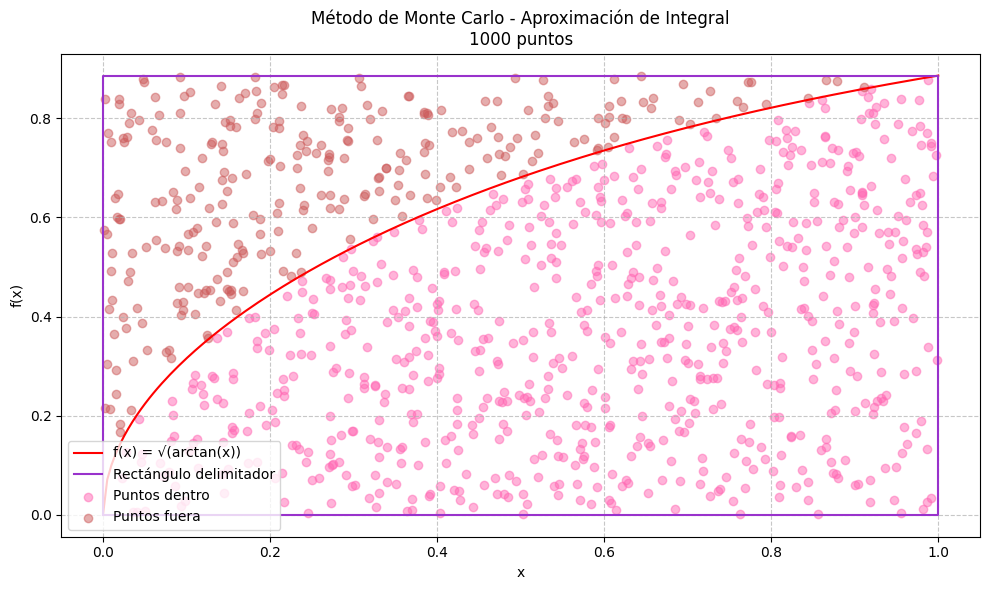

In [53]:
# Parámetros de simulación
num_puntos = 1000

# Realizar la aproximación de la integral
integral_aprox, x_total, y_total = monte_carlo_integral(num_puntos)

# Calcular el valor real de la integral para comparación
integral_real, _ = integrate.quad(f, 0, 1)

# Imprimir resultados
print(f"Número de puntos: {num_puntos}")
print(f"Aproximación de la integral por Monte Carlo: {integral_aprox:.6f}")
print(f"Valor real de la integral: {integral_real:.6f}")
print(f"Error absoluto: {abs(integral_real - integral_aprox):.6f}")
print(f"Error relativo: {abs(integral_real - integral_aprox)/integral_real * 100:.4f}%")

# Graficar el resultado de Monte Carlo
graficar_resultado(x_total, y_total, num_puntos)

Valor real de la integral: 0.629823
Valor final promedio: 0.630169
Desviación estándar final: 0.003761
Error absoluto final: 0.000346


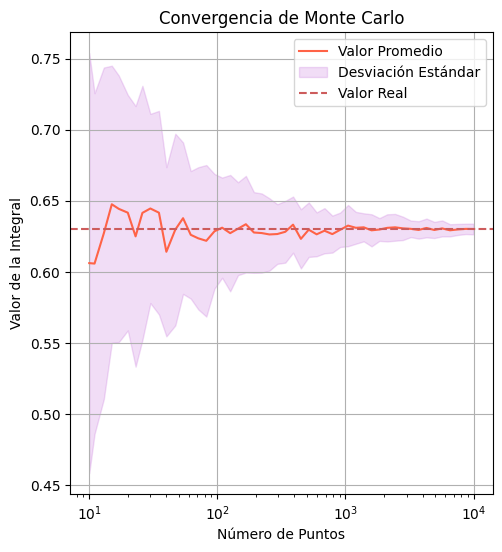

In [55]:
# Parámetros de simulación
max_puntos = 10000
num_experimentos = 50

# Calcular convergencia
numeros_puntos, valores_promedio, desviacion_estandar, integral_real = calcular_convergencia(max_puntos, num_experimentos)

# Graficar convergencia
graficar_convergencia(numeros_puntos, valores_promedio, desviacion_estandar, integral_real)

# Imprimir resultados finales
print(f"Valor real de la integral: {integral_real:.6f}")
print(f"Valor final promedio: {valores_promedio[-1]:.6f}")
print(f"Desviación estándar final: {desviacion_estandar[-1]:.6f}")
print(f"Error absoluto final: {abs(valores_promedio[-1] - integral_real):.6f}")